# Interactive Linguistic Essay with Jupyter Notebook

The aim of this essay is to provide basic linguistic analysis of data from a website and demonstrate the most common Natural Language Processing techniques with the use of **Jupyter Notebook** features and **NLTK** modules.

The text data for this analysis is extracted from the website [Goodreads](https://www.goodreads.com/) using **Web Scraping** technique. Firstly, the web page is downloaded with the use of Python requests library as follows:

In [5]:
import requests

In [6]:
page = requests.get("https://www.goodreads.com/")

In [7]:
print(page)

<Response [200]>


The above output provides an information that the page was downloaded successfully.

Next, **the BeautifulSoup library** is applied to extract the sheer content from the website.

In [8]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(page.content, 'html.parser')

In [9]:
#print(soup.prettify())

The below code finds all paragraphs in the text and returns a list of them.

In [10]:
paras = soup.find_all('p')

In [11]:
only_text = []
for para in paras:
    processed_para = para.get_text()
    processed_para = processed_para.strip()
    if len(processed_para) > 1:
        only_text.append(processed_para)
print(only_text)

['You’re in the right place. Tell us what titles or genres you’ve enjoyed in the past, and we’ll give you surprisingly insightful recommendations.', 'Chances are your friends are discussing their favorite\n      (and least favorite) books on Goodreads.', 'Because ♥Meagan♥ liked…', 'She discovered:', 'Historical Fiction, Book Club', 'Because Deborah liked…', 'She discovered:', 'Steam Punk, Science Fiction, Fantasy', 'More book lists', 'Gain access to a massive audience of book lovers.\n          Goodreads is a great place to promote your books.', 'Welcome back. Just a moment while we sign you in to your Goodreads account.']


The output contains elements that are unnecessary and might even disrupt further analysis, therefore, more cleaning techniques can be adopted to remove them and standardize the text. For this purpose, the list is converted to a string as follows:

In [12]:
text = " "
text = text.join(only_text)
print(text)

You’re in the right place. Tell us what titles or genres you’ve enjoyed in the past, and we’ll give you surprisingly insightful recommendations. Chances are your friends are discussing their favorite
      (and least favorite) books on Goodreads. Because ♥Meagan♥ liked… She discovered: Historical Fiction, Book Club Because Deborah liked… She discovered: Steam Punk, Science Fiction, Fantasy More book lists Gain access to a massive audience of book lovers.
          Goodreads is a great place to promote your books. Welcome back. Just a moment while we sign you in to your Goodreads account.


### Case normalization

In [13]:
text = text.lower()
print(text)

you’re in the right place. tell us what titles or genres you’ve enjoyed in the past, and we’ll give you surprisingly insightful recommendations. chances are your friends are discussing their favorite
      (and least favorite) books on goodreads. because ♥meagan♥ liked… she discovered: historical fiction, book club because deborah liked… she discovered: steam punk, science fiction, fantasy more book lists gain access to a massive audience of book lovers.
          goodreads is a great place to promote your books. welcome back. just a moment while we sign you in to your goodreads account.


The above code converts all characters in the text to lowercase, as the output shows.

### Removing special characters

Another step to normalize the text is to remove all special characters, including punctuation marks, Emoji’s, URL’s and @’s, which can be carried out with the below code:

In [14]:
import re
text = re.sub(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", text)
print(text)

youre in the right place tell us what titles or genres youve enjoyed in the past and well give you surprisingly insightful recommendations chances are your friends are discussing their favorite      and least favorite books on goodreads because meagan liked she discovered historical fiction book club because deborah liked she discovered steam punk science fiction fantasy more book lists gain access to a massive audience of book lovers          goodreads is a great place to promote your books welcome back just a moment while we sign you in to your goodreads account


### Removing stop words

To remove *stop words*, the English stop words library from NLTK can be used.

In [15]:
import nltk.corpus
nltk.download('stopwords')
from nltk.corpus import stopwords

stop = stopwords.words('english')
text = " ".join([word for word in text.split() if word not in (stop)])

print(text)

youre right place tell us titles genres youve enjoyed past well give surprisingly insightful recommendations chances friends discussing favorite least favorite books goodreads meagan liked discovered historical fiction book club deborah liked discovered steam punk science fiction fantasy book lists gain access massive audience book lovers goodreads great place promote books welcome back moment sign goodreads account


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


For the purpose of further analysis some words had to be removed manually, as they are not present in the stop list imported from the library:

In [16]:
stopwords = ['youre','us','youve','shomeret']
textwords = text.split()

resultwords  = [word for word in textwords if word not in stopwords]
text = ' '.join(resultwords)

print(text)

right place tell titles genres enjoyed past well give surprisingly insightful recommendations chances friends discussing favorite least favorite books goodreads meagan liked discovered historical fiction book club deborah liked discovered steam punk science fiction fantasy book lists gain access massive audience book lovers goodreads great place promote books welcome back moment sign goodreads account


Finally, with the above data further NLP techniques can be applied, such as:
- tokenization
- part-of-speech (POS) tagging.

### Tokenization

In [17]:
import nltk 
nltk.download('punkt')

tokens = nltk.word_tokenize(text)

print(tokens)

['right', 'place', 'tell', 'titles', 'genres', 'enjoyed', 'past', 'well', 'give', 'surprisingly', 'insightful', 'recommendations', 'chances', 'friends', 'discussing', 'favorite', 'least', 'favorite', 'books', 'goodreads', 'meagan', 'liked', 'discovered', 'historical', 'fiction', 'book', 'club', 'deborah', 'liked', 'discovered', 'steam', 'punk', 'science', 'fiction', 'fantasy', 'book', 'lists', 'gain', 'access', 'massive', 'audience', 'book', 'lovers', 'goodreads', 'great', 'place', 'promote', 'books', 'welcome', 'back', 'moment', 'sign', 'goodreads', 'account']


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


The above output presents the analysed text splitted into *tokens*. In this case each token is a single word. Tokenization allows to procede with POS tagging.

### Part-of-speech tagging

The below code categorizes the tokens in correspondence with a particular part of speech:

In [18]:
import nltk
nltk.download('averaged_perceptron_tagger')

tagged = nltk.pos_tag(tokens)

print(tagged)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('right', 'JJ'), ('place', 'NN'), ('tell', 'VBP'), ('titles', 'NNS'), ('genres', 'NNS'), ('enjoyed', 'VBD'), ('past', 'RB'), ('well', 'RB'), ('give', 'VB'), ('surprisingly', 'RB'), ('insightful', 'JJ'), ('recommendations', 'NNS'), ('chances', 'NNS'), ('friends', 'NNS'), ('discussing', 'VBG'), ('favorite', 'JJ'), ('least', 'JJS'), ('favorite', 'JJ'), ('books', 'NNS'), ('goodreads', 'NNS'), ('meagan', 'RB'), ('liked', 'VBD'), ('discovered', 'JJ'), ('historical', 'JJ'), ('fiction', 'NN'), ('book', 'NN'), ('club', 'NN'), ('deborah', 'NN'), ('liked', 'VBD'), ('discovered', 'VBN'), ('steam', 'NN'), ('punk', 'NN'), ('science', 'NN'), ('fiction', 'NN'), ('fantasy', 'JJ'), ('book', 'NN'), ('lists', 'NNS'), ('gain', 'VBP'), ('access', 'NN'), ('massive', 'JJ'), ('audience', 'NN'), ('book', 'NN'), ('lovers', 'NNS'), ('goodreads', 'VBP'), ('great', 'JJ'), ('place', 'NN'), ('promote', 'VBP'), ('books', 'NNS'), ('welcome', 'VB'), ('back', 'RB'), ('moment', 'NN'), ('sign', 'NN'), ('goodreads', 'NNS')

The output reveals that the data contains a number of **adjectives**, **nouns** (both singular and plural), **verbs** (in different tense forms), and **adverbs**.

To establish the exact number of each part of speech present in the data, the below code is used:

In [19]:
counter_dict = {}
for item in tagged:
    if item[1] not in counter_dict:
        counter_dict[item[1]] = 1
    else:
        counter_dict[item[1]] += 1

print(counter_dict)

{'JJ': 9, 'NN': 16, 'VBP': 5, 'NNS': 11, 'VBD': 3, 'RB': 5, 'VB': 2, 'VBG': 1, 'JJS': 1, 'VBN': 1}


This concludes that the data contains:
- 13 nouns in the singular form
- 12 nouns in the plural form
- 10 adjectives
- 5 verbs in non-3rd person singular present form
- 5 adverbs
- 3 verbs in past tense form
- 2 verbs in base form
- 1 verb in gerund or present participle form
- 1 superlative adjective.

Gathered data is visualized with the use of **matplotlib** on the following chart:

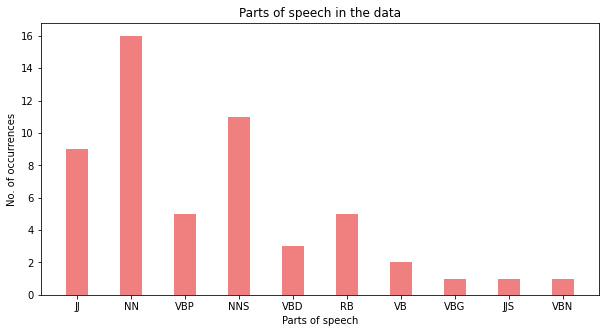

In [22]:
import numpy as np
import matplotlib.pyplot as plt
 
pos = list(counter_dict.keys())
values = list(counter_dict.values())
  
fig = plt.figure(figsize = (10, 5))
 
plt.bar(pos, values, color ='lightcoral',
        width = 0.4)
 
plt.xlabel("Parts of speech")
plt.ylabel("No. of occurrences")
plt.title("Parts of speech in the data")
plt.show()